In [87]:
%matplotlib inline

import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 
import numpy as np

#### Looking at the cifar data set images: Matrix to image

numpy.ndarray

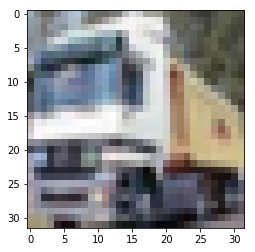

In [129]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape

imgplot = plt.imshow(X_train[1])
type(y_test[0:22])

#### Now make the images into matricies

In [174]:
img = cv2.imread('43M_SP_O.bmp')
img.shape

(650, 506, 3)

In [175]:
im2 = cv2.resize(img, dsize=(400,400))

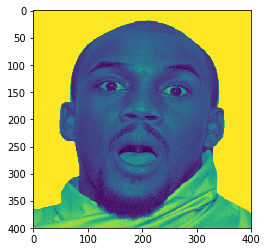

In [176]:
im = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_RGB2GRAY))

In [154]:
im2.shape

(150, 150, 3)

#### Lets now parse through the file containing all images and convert to a list of arrays

In [23]:
import os

#### This next portion:
$\bullet$ Read in the images and make them matricies

$\bullet$ Create a list of labels for images, in respective order 

$\bullet$ Place both lists into a text file
    
    Anger : 0 
    Calm : 1
    Disgust : 2
    Fear : 3
    Happy: 4
    Neutral: 5
    Sad : 6
    Surprise : 7

In [205]:
img_list = []
label_list = []
path = os.getcwd()
for j,i in enumerate(os.listdir('NimStim')):
    missing = False
    for z,x in enumerate(os.listdir('Class_em')):
        if i in os.listdir('Class_em\\' + x):
            label_list.append([z])
            break
        else:
            if z == 7:
                print('Missing label for image: ' + str(i))
                missing = True
    if missing == False:
        try:
            img = cv2.imread(path + '\\NimStim\\' + i)
            img1 = cv2.resize(img, dsize=(400,400))
            img2 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
            img_list.append(img2)
        except Exception as e:
            print(e, i)
    else:
        pass

Missing label for image: 01f_an_c.bmp


In [206]:
y = np.asarray(label_list)
x = np.asarray(img_list)
np.save('X_data', x)
np.save('y_data', y)